# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. 
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

sns.set(palette='Set2')

---
### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** В предыдущей задаче мы получили, что $S^2$ не является несмещенной, а $\frac{n}{n-1}S^2$ является несмещенной.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture1_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


In [61]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
# y - номер оценки
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.legend()

SyntaxError: invalid syntax (511653515.py, line 2)

**Решение:**

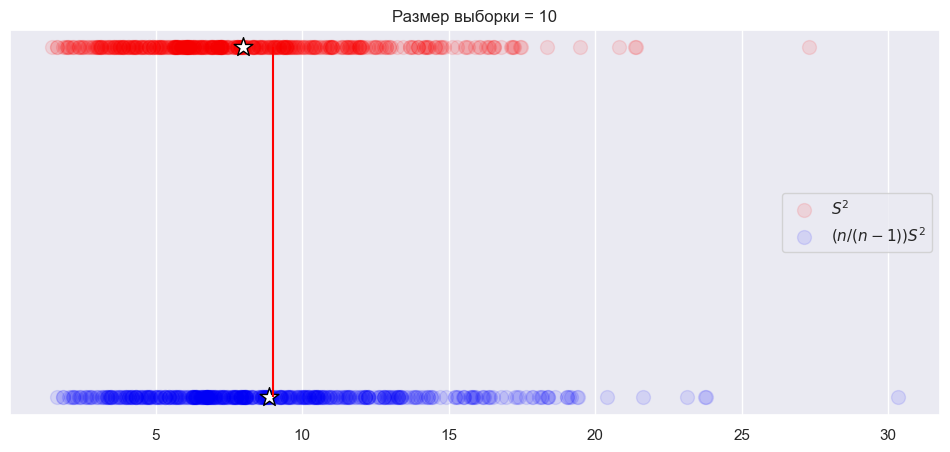

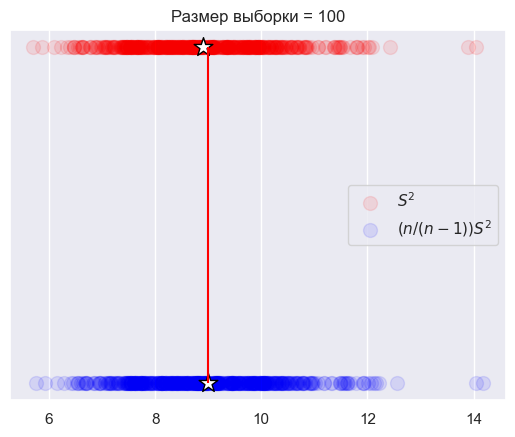

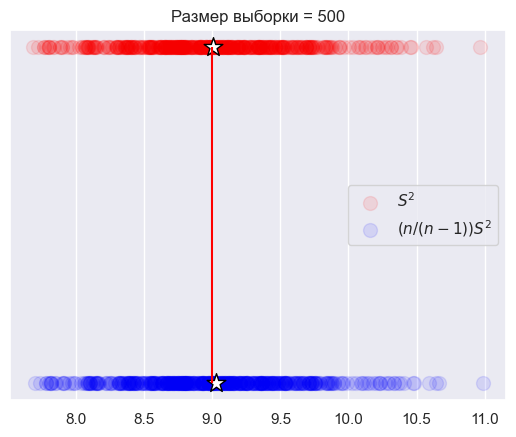

In [62]:
sigma = 3
k = 500
n_arr = [10, 100, 500]

plt.figure(figsize=(12,5))

def count_first_eval(sample):
    return np.sum((sample-np.mean(sample))**2) / np.size(sample)

def count_second_eval(sample):
    return np.sum((sample-np.mean(sample))**2) / (np.size(sample) - 1)

for n in n_arr:
    first_eval = np.zeros(k)
    second_eval = np.zeros(k)
    for i in range(k):
        sample = sps.norm(0,sigma).rvs(size=n)
        first_eval[i] = count_first_eval(sample)
        second_eval[i] = count_second_eval(sample)
    plt.scatter(first_eval , np.zeros(k) + 1, 
            alpha=0.1, s=100, color="red", label='$S^2$')
    plt.scatter(np.mean(first_eval), 1, marker='*', s=200, 
            color='w', edgecolors='black')
    
    plt.scatter(second_eval , np.zeros(k) + 0, 
            alpha=0.1, s=100, color="blue", label='$(n / (n - 1)) S^2$')
    plt.scatter(np.mean(second_eval), 0, marker='*', s=200, 
            color='w', edgecolors='black')

    plt.vlines(sigma**2, 0, 1, color='r')
    plt.title(f'Размер выборки = {n}')
    plt.yticks([])
    plt.legend()
    plt.show()

    

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

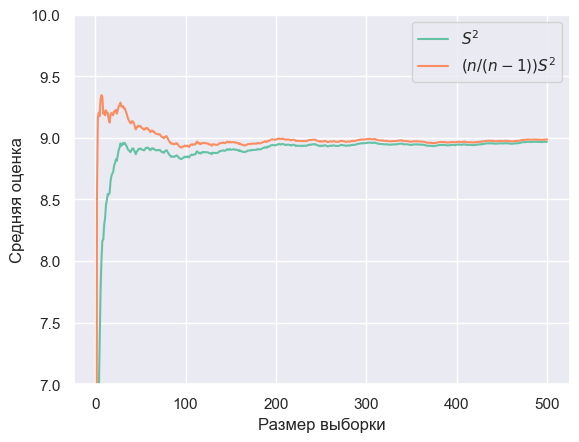

In [67]:
n=500
samples = sps.norm(0,sigma).rvs(size=(k, n))
arange = np.arange(1, n + 1)
first_eval = np.cumsum(samples**2, axis = 1)/ arange - (np.cumsum(samples, axis = 1)/arange)**2
arange[0] = 2 # чтобы не было проблем с делением на 0
second_eval = first_eval * arange / (arange - 1)

plt.plot(range(1, n + 1), np.mean(first_eval, axis=0), label='$S^2$')
plt.plot(range(1, n + 1), np.mean(second_eval, axis=0), label='$(n / (n - 1)) S^2$')
plt.xlabel('Размер выборки')
plt.ylabel('Средняя оценка')
plt.ylim(7,10)
plt.legend()
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? 

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** 

Мы исследовали 2 оценки для дисперсии и поняли, что оценка, которая в теории является несмещенной на практике действительно лучше приближает, чем оценка, которая является смещенной. Однако, по графикам видно, что среднее значение оценки $S^2$ также приближается с ростом размера выборки к $\sigma^2$. 

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.

Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.
 
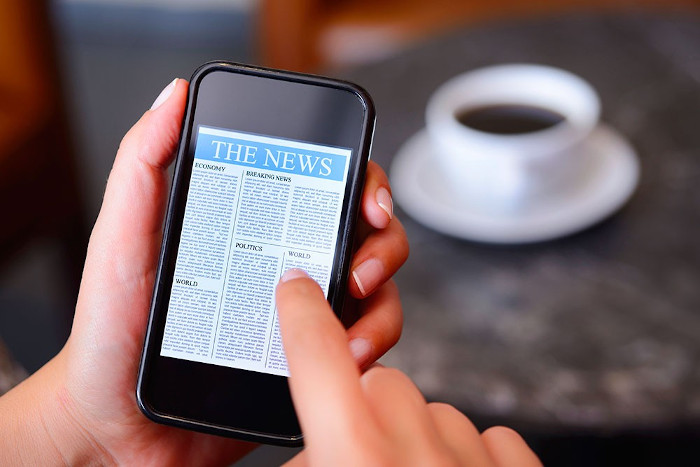



Перед выполнением задачи обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [ ]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [ ]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [ ]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [ ]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val = train_test_split(data_train['data'], test_size=0.2, random_state=random_state)
Y_train, Y_val = train_test_split(data_train['target'], test_size=0.2, random_state=random_state)
X_test, Y_test = data_test['data'], data_test['target']

Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

В случае текстовой классификации с помощью мешка слов, где каждый текст представлен вектором частоты слов, метод ближайших соседей может быть неэффективным. Вот несколько причин:
1. Пространство признаков высокой размерности: Векторы признаков в текстовых данных обычно имеют высокую размерность, особенно если учитывать большой словарный запас. Для вычисления KNN для таких размерностей потребуется огромная вычислительная мощность.
2. Разреженность данных: Мешок слов представляет каждый текст как вектор, где каждый элемент соответствует отдельному слову из словаря. Большинство текстов будут содержать только небольшой набор слов из всего словаря, что приводит к разреженности данных и усложняет определение "ближайших" соседей.

Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

In [ ]:
min_df_arr = np.arange(0.005, 0.03, 0.005)
max_df_arr = np.arange(0.035, 0.06, 0.005)
accuracies = {}
for min_df in min_df_arr:
    for max_df in max_df_arr:
        vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
        vec_data_train = vectorizer.fit_transform(X_train).toarray()
        vec_data_val = vectorizer.transform(X_val)
        multinomial_nb = MultinomialNB()
        multinomial_nb.fit(vec_data_train, Y_train)
        predictions = multinomial_nb.predict(vec_data_val)
        accuracies[min_df,max_df] = accuracy_score(Y_val, predictions)

Найдем индекс с лучшей точностью.

In [ ]:
max_acc_ind = list(accuracies.keys())[list(accuracies.values()).index(max(accuracies.values()))]
max_acc_ind

(0.005, 0.049999999999999996)

Выведем чему равна точность.

In [ ]:
accuracies[0.005, 0.049999999999999996]

0.7662395050817499

Посчитайте качество на тестовой выборке.

In [ ]:
vectorizer = CountVectorizer(min_df=0.005, max_df=0.05)
vec_data_train = vectorizer.fit_transform(X_train).toarray()
vec_data_test = vectorizer.transform(X_test)
multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, Y_train)
predictions = multinomial_nb.predict(vec_data_test)

In [ ]:
print(f'Точность: {accuracy_score(Y_test, predictions):.3}')

Точность: 0.678


Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">семинаре</a>, так и самостоятельно написать нейросеть.

Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?

Сделайте выводы.

---
### Задача 4.

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова. 

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.


1. В квадратичном дискриминантном анализе (QDA) для каждого класса предполагается, что условное распределение признаков $X$ задается многомерным нормальным распределением с различными матрицами ковариации. Разделяющая поврехность же задается уравнением:
p(X|Y=k) = p(X|Y=\ell)
Так как в линейном дискриминантном анализе предполагается, что все классы имеют одинаковую матрицу ковариаций, то это уравнение принимает линейный вид по $X$. В случае же QDA все матрицы ковариаций различны, а значит уравнение принимает квадратичный вид по $X$.
2. Гипербола:
Разделяющая поверхность будет представлять собой гиперболу, если для классов $k$ и $\ell$ матрицы ковариации $\Sigma_k$ и $\Sigma_{\ell}$ равны диагональным матрицам с ненулевыми элементами на диагонали, но различными знаками. Например:
$\Sigma_k = \text{diag}(2, 1)$ и $\Sigma_{\ell} = \text{diag}(1, 2)$

Парабола:
Параболическая разделяющая поверхность может быть получена, если ковариационные матрицы $\Sigma_k$ различны и диагональны, а средние значения $a_k$ различны. Например:
$a_1 = \begin{pmatrix} 0 \ 0 \end{pmatrix}$, $a_2 = \begin{pmatrix} 2 \ 2 \end{pmatrix}$,
$\Sigma_1 = \begin{pmatrix} 2 & 0 \ 0 & 1 \end{pmatrix}$, $\Sigma_2 = \begin{pmatrix} 1 & 0 \ 0 & 2 \end{pmatrix}$.

Две параллельные прямые:
Если ковариационные матрицы $\Sigma_k$ одинаковы и диагональны, а средние значения $a_k$ различны, то разделяющая поверхность будет представлять собой две параллельные прямые. Например:
$a_1 = \begin{pmatrix} 0 \ 0 \end{pmatrix}$, $a_2 = \begin{pmatrix} 0 \ 2 \end{pmatrix}$,
$\Sigma_1 = \begin{pmatrix} 2 & 0 \ 0 & 1 \end{pmatrix}$, $\Sigma_2 = \begin{pmatrix} 2 & 0 \ 0 & 1 \end{pmatrix}$.

Две пересекающиеся прямые:
Если ковариационные матрицы $\Sigma_k$ одинаковы и не диагональны, а средние значения $a_k$ различны, то разделяющая поверхность будет представлять собой две пересекающиеся прямые. Например:
$a_1 = \begin{pmatrix} 0 \ 0 \end{pmatrix}$, $a_2 = \begin{pmatrix} 2 \ 2 \end{pmatrix}$,
$\Sigma_1 = \begin{pmatrix} 2 & 1 \ 1 & 2 \end{pmatrix}$, $\Sigma_2 = \begin{pmatrix} 2 & -1 \ -1 & 2 \end{pmatrix}$.